## Static Recognition Model Training & Testing

In [79]:
import csv
import os
from constants import FRAMES_PER_TRAINING, TRAININGS_PER_LABEL, STATIC_LABELS_PATH, KEYPOINTS_PATH
import numpy as np

In [80]:
from files_io import readActionLabels, readActionMapping

static_labels = readActionLabels()
static_labels

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 'airplane']

In [81]:
static_mapping = readActionMapping()
static_mapping

{'A': '0',
 'B': '1',
 'C': '2',
 'D': '3',
 'E': '4',
 'F': '5',
 'G': '6',
 'H': '7',
 'I': '8',
 'J': '9',
 'K': '10',
 'L': '11',
 'M': '12',
 'N': '13',
 'O': '14',
 'P': '15',
 'Q': '16',
 'R': '17',
 'S': '18',
 'T': '19',
 'U': '20',
 'V': '21',
 'W': '22',
 'X': '23',
 'Y': '24',
 'Z': '25',
 '1': '26',
 '2': '27',
 '3': '28',
 '4': '29',
 '5': '30',
 '6': '31',
 '7': '32',
 '8': '33',
 '9': '34',
 '10': '35',
 'airplane': '36'}

### 1. Preprocess Data

In [82]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

In [83]:
features, labels = [], []

for static in static_labels:
    sequence = np.load(os.path.join(KEYPOINTS_PATH, f"{static}.npy"))
    # seperate out the features and labels
    for i in range(len(sequence)):
    # for i in range(TRAININGS_PER_LABEL):
        features.append(sequence[i])
        labels.append(static_mapping[static])
      
print(len(features))
print(len(labels))
print(features)
print(labels)

3700
3700
[array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.    

In [84]:
X = np.array(features)
X.shape

(3700, 138)

In [85]:
y = to_categorical(labels).astype(int)
y.shape

(3700, 37)

In [86]:
X.nbytes

4084800

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

In [88]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2775, 138)
(925, 138)
(2775, 37)
(925, 37)


2. Model Compiling

In [89]:
from keras.models import Sequential, Model
from keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from keras.callbacks import TensorBoard

In [90]:
LOG_PATH = os.path.join("log")
tb_callback = TensorBoard(log_dir=LOG_PATH)

In [91]:
modelInputSize = (X.shape[1],1)
modelInputSize

(138, 1)

In [92]:
# Define the CNN model
model = Sequential()

# Convolutional layers
model.add(Conv1D(32, 3, activation='relu', input_shape=modelInputSize))
model.add(MaxPooling1D(2))
model.add(Conv1D(64, 3, activation='relu'))
model.add(MaxPooling1D(2))
model.add(Conv1D(128, 3, activation='relu'))

model.add(Flatten())

# Dense layers for translation (ANN)
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Final output layer
model.add(Dense(len(static_labels), activation='softmax'))  # 3 output classes

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_9 (Conv1D)           (None, 136, 32)           128       
                                                                 
 max_pooling1d_6 (MaxPoolin  (None, 68, 32)            0         
 g1D)                                                            
                                                                 
 conv1d_10 (Conv1D)          (None, 66, 64)            6208      
                                                                 
 max_pooling1d_7 (MaxPoolin  (None, 33, 64)            0         
 g1D)                                                            
                                                                 
 conv1d_11 (Conv1D)          (None, 31, 128)           24704     
                                                                 
 flatten_3 (Flatten)         (None, 3968)             

In [93]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

3. Model Training

In [94]:
model.fit(X_train, y_train, epochs=30)

Epoch 1/30
87/87 [==============================] - 3s 24ms/step - loss: 1.9388 - categorical_accuracy: 0.5157
Epoch 2/30
87/87 [==============================] - 2s 26ms/step - loss: 0.4606 - categorical_accuracy: 0.9164
Epoch 3/30
87/87 [==============================] - 3s 33ms/step - loss: 0.1766 - categorical_accuracy: 0.9737
Epoch 4/30
87/87 [==============================] - 3s 32ms/step - loss: 0.0977 - categorical_accuracy: 0.9856
Epoch 5/30
87/87 [==============================] - 3s 30ms/step - loss: 0.0675 - categorical_accuracy: 0.9914
Epoch 6/30
87/87 [==============================] - 3s 33ms/step - loss: 0.0440 - categorical_accuracy: 0.9939
Epoch 7/30
87/87 [==============================] - 2s 28ms/step - loss: 0.0450 - categorical_accuracy: 0.9932
Epoch 8/30
87/87 [==============================] - 2s 26ms/step - loss: 0.0392 - categorical_accuracy: 0.9928
Epoch 9/30
87/87 [==============================] - 2s 25ms/step - loss: 0.0288 - categorical_accuracy: 0.9946
E

In [95]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_9 (Conv1D)           (None, 136, 32)           128       
                                                                 
 max_pooling1d_6 (MaxPoolin  (None, 68, 32)            0         
 g1D)                                                            
                                                                 
 conv1d_10 (Conv1D)          (None, 66, 64)            6208      
                                                                 
 max_pooling1d_7 (MaxPoolin  (None, 33, 64)            0         
 g1D)                                                            
                                                                 
 conv1d_11 (Conv1D)          (None, 31, 128)           24704     
                                                                 
 flatten_3 (Flatten)         (None, 3968)             

4. Model Testing

In [96]:
test_results = model.predict(X_test)

29/29 [==============================] - 0s 5ms/step


In [97]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [98]:
y_actual = np.argmax(y_test, axis=1)
y_predict = np.argmax(test_results, axis=1)

In [99]:
accuracy_score(y_actual, y_predict)

0.9945945945945946

In [100]:
multilabel_confusion_matrix(y_actual, y_predict)

array([[[900,   0],
        [  0,  25]],

       [[894,   1],
        [  0,  30]],

       [[897,   0],
        [  0,  28]],

       [[901,   0],
        [  0,  24]],

       [[900,   0],
        [  0,  25]],

       [[898,   0],
        [  0,  27]],

       [[901,   0],
        [  0,  24]],

       [[899,   0],
        [  0,  26]],

       [[901,   0],
        [  0,  24]],

       [[905,   0],
        [  0,  20]],

       [[901,   0],
        [  0,  24]],

       [[902,   0],
        [  0,  23]],

       [[903,   0],
        [  0,  22]],

       [[902,   0],
        [  0,  23]],

       [[894,   0],
        [  0,  31]],

       [[902,   0],
        [  0,  23]],

       [[901,   0],
        [  0,  24]],

       [[899,   0],
        [  0,  26]],

       [[902,   0],
        [  0,  23]],

       [[899,   0],
        [  0,  26]],

       [[890,   0],
        [  0,  35]],

       [[900,   2],
        [  0,  23]],

       [[903,   2],
        [  0,  20]],

       [[902,   0],
        [  0, 

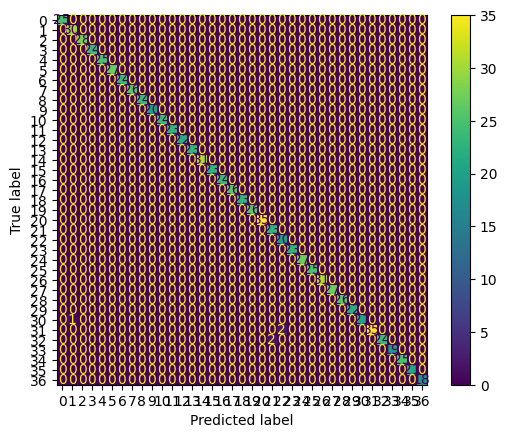

In [101]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

cm = confusion_matrix(y_actual, y_predict)
cmDisp = ConfusionMatrixDisplay(confusion_matrix=cm)
cmDisp.plot()
plt.show()

5. Saving Model Weights

In [102]:
MODEL_PATH = os.path.join("../static_recognition/models")

In [103]:
# model.save(os.path.join(MODEL_PATH, "static_model.h5"))
model.save(os.path.join(MODEL_PATH, "static_model_hand_only.h5"))

c:\Users\Eng Lip\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
